# Course 1

# Final Algorithm

In [23]:
import pandas as pd

In [24]:
reviews = pd.read_csv('imdb-reviews-pt-br.csv')

FileNotFoundError: [Errno 2] File b'imdb-reviews-pt-br.csv' does not exist: b'imdb-reviews-pt-br.csv'

In [55]:
map_sentiment = {'neg': 0,
                'pos': 1}

In [56]:
reviews['class'] = reviews['sentiment'].map(map_sentiment)

In [57]:
reviews.head()

,id,text_en,text_pt,sentiment,processed_phrases,class
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,mais vez sr costner arrumou filme tempo necess...,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,este exemplo motivo maioria filmes acao mesmos...,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,primeiro tudo odeio raps imbecis poderiam agir...,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,nem beatles puderam escrever musicas todos gos...,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,filmes fotos latao palavra apropriada verdade ...,0


In [58]:
def generate_bag_of_words(df, text_column, max_features):
    from sklearn.feature_extraction.text import CountVectorizer
    count_vectorizer = CountVectorizer(lowercase=True, max_features=max_features)
    bag_of_words = count_vectorizer.fit_transform(df[text_column])
    return bag_of_words

In [59]:
bag_of_words = generate_bag_of_words(
    df=reviews, 
    text_column='text_pt', 
    max_features=1000)

In [60]:
def generate_splited_texts(bag_of_words,df, class_column, test_size, random_state):
    from sklearn.model_selection import train_test_split
    reviews_train, reviews_test, class_train, class_test = train_test_split(
        bag_of_words, 
        df[class_column],
        test_size=test_size,
        random_state=random_state
        )
    return reviews_train, reviews_test, class_train, class_test

In [61]:
reviews_train, reviews_test, class_train, class_test = generate_splited_texts(
    bag_of_words,
    df=reviews, 
    class_column='class', 
    test_size=0.2, 
    random_state=200)

In [62]:
def classify_text(train_dataset, class_dataset, max_iter):    
    from sklearn.linear_model import LogisticRegression
    logistic_regression = LogisticRegression(solver='lbfgs', max_iter=max_iter)
    logistic_regression.fit(reviews_train, class_train)
    accuracy  = logistic_regression.score(reviews_test, class_test)
    print(f'ACURÁCIA: {accuracy}')

In [63]:
classify_text(
    train_dataset=reviews_train, 
    class_dataset=class_train, 
    max_iter=1000)

ACURÁCIA: 0.8502830570157703


In [70]:
df = reviews
text_column = 'processed_phrases'
class_column = 'class'
test_size=0.2
random_state=100
max_features = 1000
max_iter = 200
train_dataset=reviews_train 
class_dataset=class_train 

In [71]:
def pipeline_classify_text(
    df, text_column, class_column, train_dataset, class_dataset, 
    test_size, random_state, max_features, max_iter):
    
    bag_of_words = generate_bag_of_words(df, text_column, max_features)
    
    reviews_train, reviews_test, class_train, class_test = generate_splited_texts(
        bag_of_words,
        df, 
        class_column, 
        test_size, 
        random_state)
    
    classify_text(train_dataset, class_dataset, max_iter)

In [72]:
pipeline_classify_text(
    df, 
    text_column, 
    class_column, 
    train_dataset, 
    class_dataset, 
    test_size, 
    random_state, 
    max_features, 
    max_iter)

ACURÁCIA: 0.8503841488071169


C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [73]:
def generate_word_cloud(df):
    %matplotlib inline
    from wordcloud import WordCloud
    all_words = ' '.join([ text for text in df ])
    
    word_cloud = WordCloud(
        width=800,
        height=500,
        max_font_size=110,
        collocations=False)
    
    word_cloud = word_cloud.generate(text=all_words)
    
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10,7))

    plt.imshow(
        word_cloud, 
        interpolation='bilinear')
    plt.axis('off')
    plt.show()

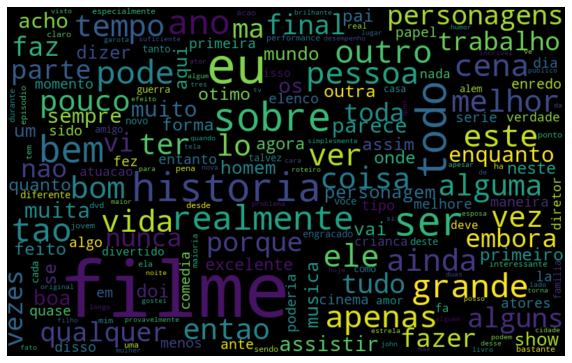

In [74]:
generate_word_cloud(
    reviews[reviews['sentiment'] == 'pos']['processed_phrases'])

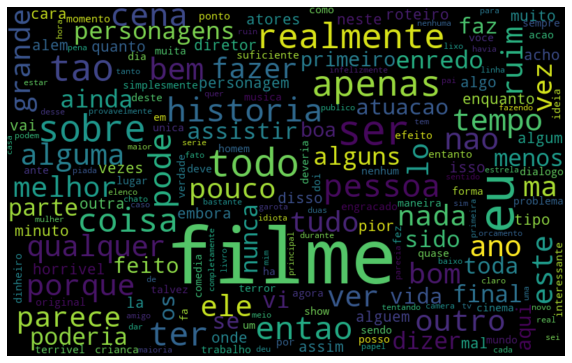

In [75]:
generate_word_cloud(
    reviews[reviews['sentiment'] == 'neg']['processed_phrases'])

# Exploration

In [1]:
import pandas as pd

In [2]:
reviews = pd.read_csv('imdb-reviews-pt-br.csv')

In [3]:
reviews.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
map_sentiment = {'neg': 0,
                'pos': 1}

In [5]:
reviews['class'] = reviews['sentiment'].map(map_sentiment)

In [6]:
reviews.head()

,id,text_en,text_pt,sentiment,class
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


# Data Exploration

In [7]:
reviews['class'].value_counts()

0    24765
1    24694
Name: class, dtype: int64

# Bag of Words
Creates a Sparse Matrix that contains the frequency that the words occurs in vocabulary

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

The argument `max_feature` delimites the max number of words that will form the Bag of Words matrix. It will choose automatically the most relevant words

In [125]:
count_vectorizer = CountVectorizer(lowercase=True, max_features=10000)

In [126]:
bag_of_words = count_vectorizer.fit_transform(reviews['text_pt'])

In [127]:
bag_of_words

<49459x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 5880050 stored elements in Compressed Sparse Row format>

In [128]:
count_vectorizer.get_feature_names()

['00',
 '000',
 '10',
 '100',
 '1000',
 '101',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1920',
 '1930',
 '1931',
 '1932',
 '1933',
 '1934',
 '1936',
 '1938',
 '1939',
 '1940',
 '1941',
 '1942',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1951',
 '1953',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1963',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '21',
 '22',
 '23',
 '24',
 '25',
 '250',
 '26',
 '27',
 '28',
 '2ª',
 '30',
 '300',
 '3000',
 '35',
 '37',
 '3d',
 '40',
 '45',
 '50',
 '500',
 '60',
 '70',
 '73',
 '75',
 '80',
 '85',
 '90',
 '95',
 '98',
 

In [86]:
df_esparso = pd.SparseDataFrame(bag_of_words, columns = count_vectorizer.get_feature_names())

C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  """Entry point for launching an IPython kernel.
C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\sparse\frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),


In [87]:
df_esparso.head()

C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3456: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return klass(values, index=self.index, name=items, fastpath=True)
C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\sparse\frame.py:745: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=self._default_fill_value,
C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\sparse\frame.py:721: FutureWarning: SparseDataFrame is deprecated and will be removed in a fut

,00,000,10,100,11,12,13,14,15,16,...,ônibus,última,últimas,último,últimos,única,únicas,único,únicos,útil
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data split in train and test dataset

In [104]:
from sklearn.model_selection import train_test_split

In [129]:
reviews_train, reviews_test, class_train, class_test = train_test_split(
    bag_of_words, 
    reviews['class'],
    test_size=0.2,
    random_state=42
    )

# Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
logistic_regression = LogisticRegression(solver='lbfgs', max_iter=1000)

In [132]:
logistic_regression.fit(reviews_train, class_train)
accuracy  = logistic_regression.score(reviews_test, class_test)

C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [133]:
print(accuracy)

0.8669632025879499


In [136]:
def classify_text(df, text_column, class_column, max_features, test_size, max_iter):
    from sklearn.feature_extraction.text import CountVectorizer
    count_vectorizer = CountVectorizer(lowercase=True, max_features=max_features)
    bag_of_words = count_vectorizer.fit_transform(df[text_column])
    
    from sklearn.model_selection import train_test_split
    reviews_train, reviews_test, class_train, class_test = train_test_split(
        bag_of_words, 
        df[class_column],
        test_size=test_size,
        random_state=42
        )
    
    from sklearn.linear_model import LogisticRegression
    logistic_regression = LogisticRegression(solver='lbfgs', max_iter=max_iter)
    logistic_regression.fit(reviews_train, class_train)
    accuracy  = logistic_regression.score(reviews_test, class_test)
    print(f'ACURÁCIA: {accuracy}')

In [137]:
classify_text(
    df = reviews,
    text_column='text_pt',
    class_column='class',
    max_features=200,
    test_size=0.2,
    max_iter=200)

ACURÁCIA: 0.7675899716942984


In [138]:
classify_text(
    df = reviews,
    text_column='text_pt',
    class_column='class',
    max_features=100,
    test_size=0.2,
    max_iter=200)

ACURÁCIA: 0.7122927618277396


In [139]:
classify_text(
    df = reviews,
    text_column='text_pt',
    class_column='class',
    max_features=1000,
    test_size=0.2,
    max_iter=200)

ACURÁCIA: 0.8527092600080873


C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [140]:
classify_text(
    df = reviews,
    text_column='text_pt',
    class_column='class',
    max_features=5000,
    test_size=0.2,
    max_iter=200)

ACURÁCIA: 0.8680752122927619


C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


# WordCloud

In [41]:
%matplotlib inline

In [42]:
from wordcloud import WordCloud

In [49]:
all_words = ' '.join([ text for text in reviews['text_pt'] ])

In [70]:
word_cloud = WordCloud(
    width=800,
    height=500,
    max_font_size=110,
    collocations=False)

In [71]:
word_cloud = word_cloud.generate(text=all_words)

In [72]:
import matplotlib.pyplot as plt

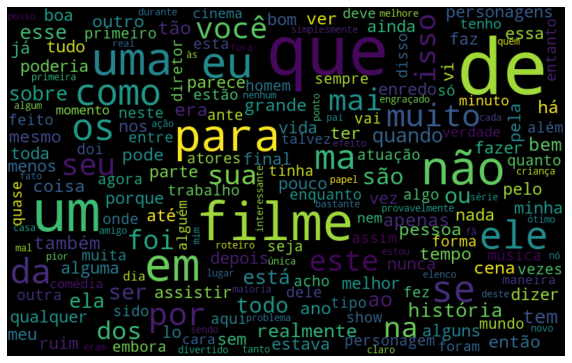

In [73]:
plt.figure(figsize=(10,7))

plt.imshow(
    word_cloud, 
    interpolation='bilinear')
plt.axis('off')
plt.show()

In [75]:
reviews[reviews['sentiment'] == 'pos']

,id,text_en,text_pt,sentiment,class
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [80]:
reviews[reviews['sentiment'] == 'neg']['text_pt']

0        Mais uma vez, o Sr. Costner arrumou um filme p...
1        Este é um exemplo do motivo pelo qual a maiori...
2        Primeiro de tudo eu odeio esses raps imbecis, ...
3        Nem mesmo os Beatles puderam escrever músicas ...
4        Filmes de fotos de latão não é uma palavra apr...
                               ...                        
37113    No final do filme, senti que era muito técnico...
37114    Este é o tipo de filme que meus inimigos me as...
37115    Eu vi Descent na noite passada no Stockholm Fi...
37116    Alguns filmes que você escolhe por um quilo sã...
37117    Este é um dos filmes mais idiotas que já vi. E...
Name: text_pt, Length: 24765, dtype: object

In [77]:
def generate_word_cloud(df):
    %matplotlib inline
    from wordcloud import WordCloud
    all_words = ' '.join([ text for text in df ])
    
    word_cloud = WordCloud(
        width=800,
        height=500,
        max_font_size=110,
        collocations=False)
    
    word_cloud = word_cloud.generate(text=all_words)
    
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10,7))

    plt.imshow(
        word_cloud, 
        interpolation='bilinear')
    plt.axis('off')
    plt.show()
    

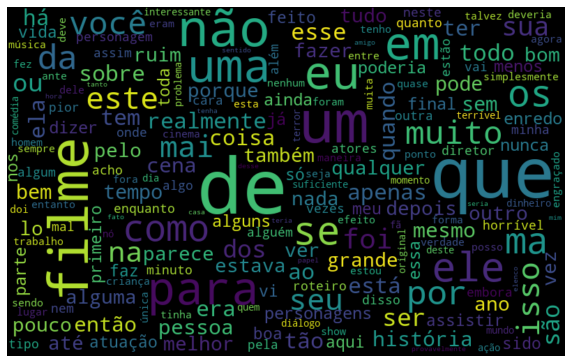

In [81]:
generate_word_cloud(
    reviews[reviews['sentiment'] == 'neg']['text_pt'])

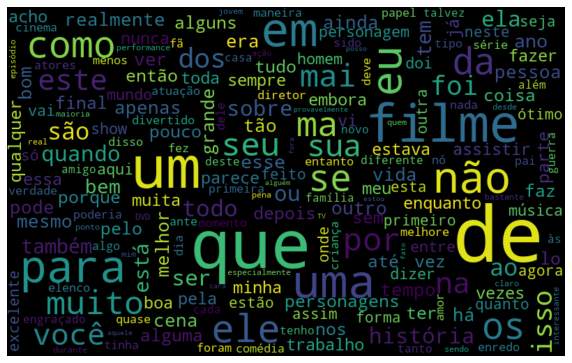

In [82]:
generate_word_cloud(
    reviews[reviews['sentiment'] == 'pos']['text_pt'])

In [83]:
import nltk

In [92]:
all_words = ' '.join([ text.lower() for text in reviews['text_pt'] ]).split()

In [94]:
frequencia = nltk.FreqDist(all_words)

In [97]:
frequencia

FreqDist({'de': 422154, 'que': 327261, 'e': 311782, 'o': 289805, 'a': 241726, 'um': 225146, 'é': 208453, 'não': 142163, 'em': 140213, 'uma': 136215, ...})

In [108]:
df_freq = pd.DataFrame({
    'word': list(frequencia.keys()),
    'frequency': list(frequencia.values())
})

In [109]:
df_freq

,word,frequency
0,mais,55117
1,uma,136215
2,"vez,",1929
3,o,289805
4,sr.,1836
...,...,...
312119,"muppified,",1
312120,inventora,1
312121,"""union",1
312122,beirar,1


In [110]:
import seaborn as sns

In [ ]:
df_sliced = df_freq.nlargest(n = 30, columns='frequency')

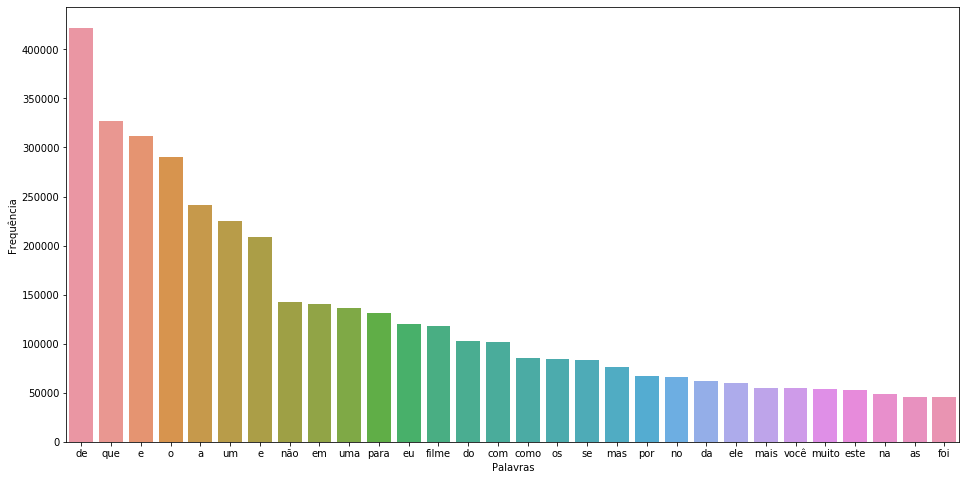

In [119]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=df_sliced, x='word', y='frequency')
ax.set(xlabel = 'Palavras')
ax.set(ylabel = 'Frequência')
plt.show()

# Course 2

In [1]:
import pandas as pd

In [2]:
reviews = pd.read_csv('imdb-reviews-pt-br.csv')

In [3]:
reviews.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
from nltk import tokenize

In [11]:
token_pontuacao = tokenize.WordPunctTokenizer()

In [12]:
frase = 'Olá Mundo!'
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
token_frase

['Olá', 'Mundo', '!']

In [13]:
from string import punctuation

In [14]:
punctuation_list = list(punctuation)

In [15]:
from nltk.corpus import stopwords

In [37]:
stop_words = stopwords.words('portuguese')
stop_words

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [40]:
import unidecode

In [38]:
stop_words_without_accent = [unidecode.unidecode(word) for word in stop_words]
stop_words_without_accent

['de',
 'a',
 'o',
 'que',
 'e',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'nao',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'a',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'ja',
 'eu',
 'tambem',
 'so',
 'pelo',
 'pela',
 'ate',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voce',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'as',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nos',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voces',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'esta',
 'estamos',
 'estao',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estavamos',
 'estavam',
 'estivera'

In [39]:
stop_words = stop_words + punctuation_list + stop_words_without_accent
stop_words

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

É necessário retirar a pontuação, pois mesmo usando o CountVectorizer para realizar a representação em Bag of Words, nós criamos a função pareto, que por sua vez não remove a pontuação automaticamente. Portanto, para que o pareto represente a frequência das palavras, o mais próximo possível da frequência da representação Bag of W\ords é importante remover as pontuações do nosso corpus.

In [46]:
processed_phrases = list()
for review in reviews['text_pt']:
    new_phrase = list()
    tokens = token_pontuacao.tokenize(review)
    new_phrase = [unidecode.unidecode(token).lower() for token in tokens if token not in stop_words]
    #for token in tokens:
    #    new_phrase = [token if token not in stop_words]
    processed_phrases.append(' '.join(new_phrase))

In [47]:
len(processed_phrases)

49459

In [48]:
processed_phrases

['mais vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens a maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava o personagem deveriamos importar arrogante superconfiante ashton kutcher o problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado seu unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers somos informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora',
 'este exemplo motivo maioria filmes acao mesmos generico chato nada valha pena assistir aqui um completo desperdicio talentos ice t cubo gelo mal aproveitados cada comprovando capazes atuar agir bem nao incomode va ver new jack city ricochet assistir new york undercover ice t boyz hood higher learning friday ice cube ver negocio re

In [49]:
reviews['processed_phrases'] = processed_phrases

In [50]:
reviews.head()

,id,text_en,text_pt,sentiment,processed_phrases
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,mais vez sr costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,nem beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,filmes fotos latao palavra apropriada verdade ...


## Removing the accents
Using the library unidecode to clean the accents (applying above)

In [51]:
reviews['processed_phrases'][1]

'este exemplo motivo maioria filmes acao mesmos generico chato nada valha pena assistir aqui um completo desperdicio talentos ice t cubo gelo mal aproveitados cada comprovando capazes atuar agir bem nao incomode va ver new jack city ricochet assistir new york undercover ice t boyz hood higher learning friday ice cube ver negocio real ice ts horrivelmente cliche dialogo sozinho faz filme ralar dentes ainda perguntando diabos bill paxton fazendo neste filme e diabos sempre interpreta exatamente personagem dos extraterrestres diante todos filmes vi bill paxton fizeram interpretar exatamente personagem irritante menos aliens personagem morreu tornou pouco gratificante ... no geral lixo acao segunda classe existem incontaveis    filmes melhores ver realmente quiser ver filme assista judgment night praticamente copia carbono melhor atuacao roteiro melhor a unica coisa fez valer pena assistir mao decente camera cinematografia quase refrescante chega perto compensar horrivel filme si bem assim

In [27]:
import unidecode

In [28]:
frase = 'péssimo é tão único tão são'
frase_limpa = unidecode.unidecode(frase)
frase_limpa

'pessimo e tao unico tao sao'